# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


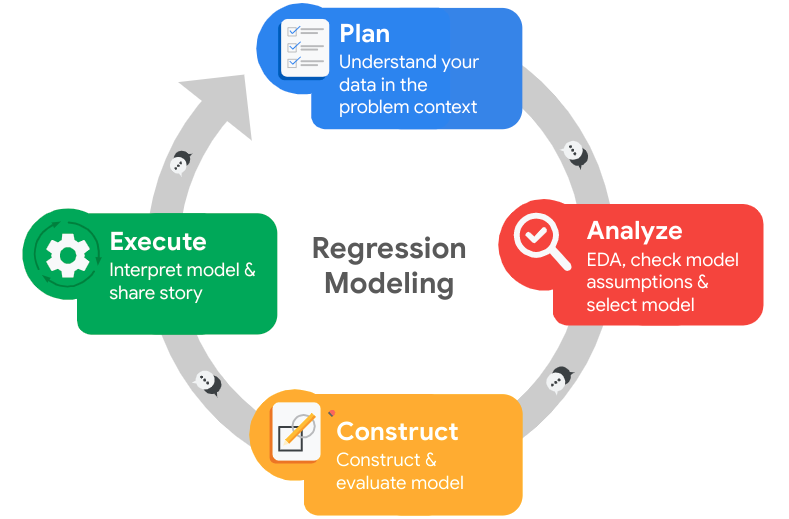

## **Pace: Plan**


### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project? Senior management 
- What are you trying to solve or accomplish? There is an issue with employee churn
- What are your initial observations when you explore the data? no null values, some misspellings, light data cleaning
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.) personal notes
- Do you have any ethical considerations in this stage? how subjective data is collected.




### Import packages

In [19]:
## data manipulation & data viz 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
## data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## metrics & functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [20]:
## Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


## Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
## Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [21]:
## Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [22]:
## Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [23]:
## Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'Department': 'department',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure'})

## Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [24]:
## Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [25]:
## Check for duplicates
df0.duplicated().sum()

3008

3,008 duplicates rows is 20% of the data

In [26]:
## Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [27]:
## Drop duplicates and save resulting dataframe in a new variable as needed
df1= df0.drop_duplicates(keep='first')

## Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

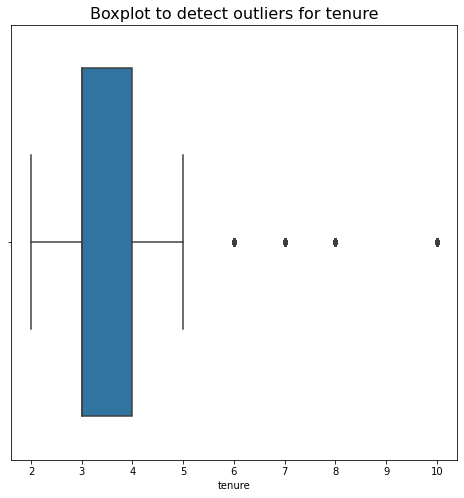

In [28]:
## Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8,8))
plt.title('Boxplot to detect outliers for tenure', fontsize=16)
sns.boxplot(x=df1['tenure'])
plt.show()


In [29]:
## Determine the number of rows containing outliers

## compute 25th percentile value in tenure
percentile25 = df1['tenure'].quantile(0.25)

## compute 7th percentile value in tenure
percentile75 = df1['tenure'].quantile(0.75)

## compute interquartile range in tenure
iqr = percentile75 - percentile25

## define upperlimit and lowerlimit for non-outlier value in tenure
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Upper limit:', upper_limit)
print('lower_limit:', lower_limit)

## identify subset of data containing outliers in tenure
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

## count how many rows in the data contain outliers in tenure
print('Number of rows in the data contain outliers in tenure:', len(outliers))

Upper limit: 5.5
lower_limit: 1.5
Number of rows in the data contain outliers in tenure: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




We cound some missspelling or issues with column headers, 
'Work_accident': 'work_accident', 
'Department': 'department',
'average_montly_hours': 'average_monthly_hours',
'time_spend_company': 'tenure'

fixed Found duplicates in about 20% of the data, created a new dataframe and droped the dublicates. Removed duplicates because it can possibly inflate classes in the model to ensure accracy they were removed.

we checked the titles, missing values, outliers to ensure the accracy of the model and future issues down the line.



## Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [30]:
## Get numbers of people who left vs. stayed

print(df1['left'].value_counts())

## Get percentages of people who left vs. stayed

print()
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

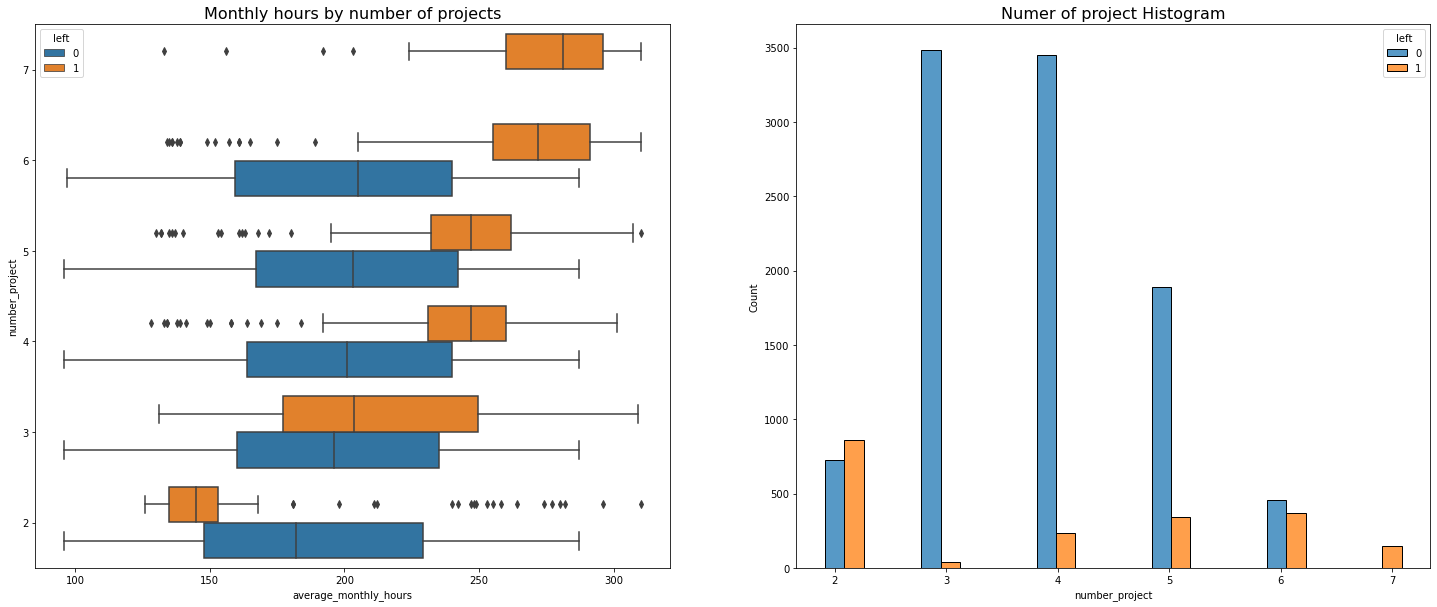

In [31]:
## create box plot and histogram

## set figues and axes
fig, ax = plt.subplots(1, 2, figsize = (25,10))

## create boxplot comparing employees those who stayed vs left from'average_monthly_hours' distrubutions for 'number_project'
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='16')

## create histogram comparing employees those who stayed vs left from 'number_project'
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Numer of project Histogram', fontsize='16')

plt.show()

It is safe to think people who work more projects would work hours. It seems to be the case here as well. 

- There seems to be a split of those who left. One group worked less (A group) than average and one that works more (B group) than avgerage. the A group was likely let go or given less work because because they were about to leave. The B group likely quit to the workload they were given and also a large part of the projects work percentage. 

- 7 projects seems to be the cutt off. Anyone with 7 projects left the company. Indiviuals with 7 projects avgeraged 225 - 300 hours per month vs other groups

- 3 - 4 projects seem to have the highest effect on keeping an empolyee. 5 projects start to deminish returns.

- If we assume a work week is 40 hours and the average hours per month is 166.67(50 weeks * 40 hours / 12 months). Besides people who worked two projects, except those who left with 2 projects, worked more than 40 hours. It is clear the employees are overworked. 

Next, is to confirm all the employees with 7 projects left. 

In [32]:
## get value of stay/left for employees with 7 projects

df1[df1['number_project']==7]['left'].value_counts()


1    145
Name: left, dtype: int64

In [33]:
project_7 = df1[df1['number_project'] == 7]

## Check if all values of 'left' are the same (1 or 0)
all_left_values = project_7['left'].nunique() == 1

print("All values of 'left' for 'number_project' equal to 7 are the same:", all_left_values)

All values of 'left' for 'number_project' equal to 7 are the same: True


Next lets look at averge monthly hours vs satisfaction level comparing left vs stayed

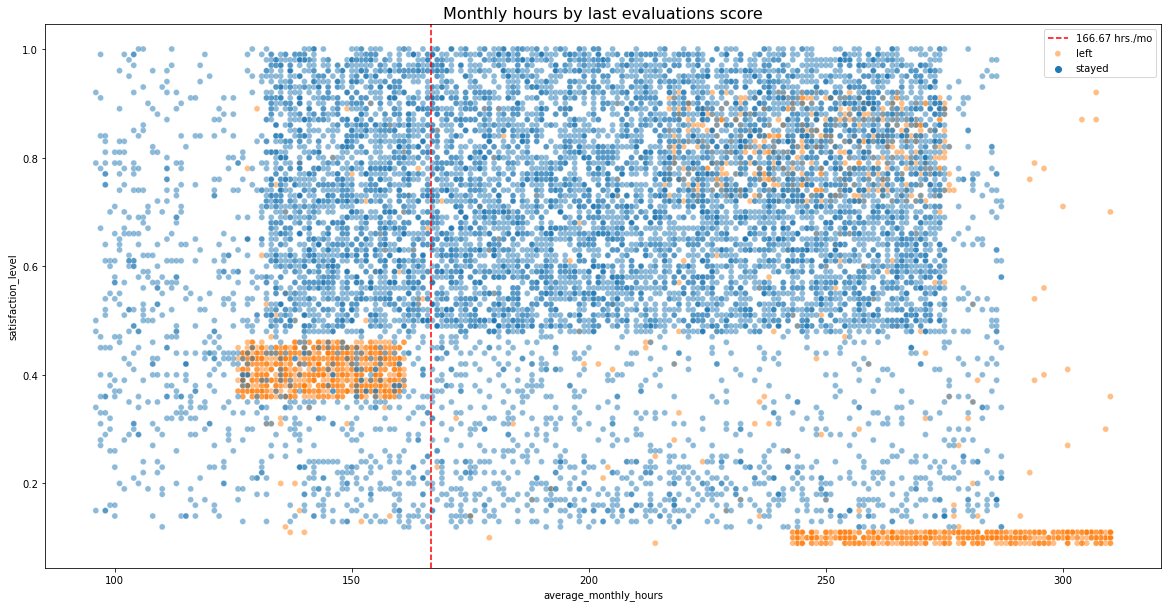

In [34]:
## create scatter plot of avg monthly hours vs satisfaction levels comparing stayed vs left
plt.figure(figsize=(20,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo', ls='--')
plt.legend(labels=['166.67 hrs./mo','left','stayed'])
plt.title('Monthly hours by last evaluations score', fontsize='16');


The scatterplot above shows a sizeable group of employees who worked from 230 - 325 hours per month (75 hours a week) are likely to have a statication rating close to 0. 

- This also shows employees working around 166 hours per month also left the company with the satifaction score of 0.4. It is possible that they were pressued to work more or pressued by their peirs around them to work more because of their monthly hours. Leaving could also explain their lowered statfaction scores. 

- There is a group of employees with the score between 0.7-0.9 whom also left the company. possible contractors or temp workers. 

- note the shape of the data is due to data manipulations or syntheic data. 

- continue on the idea of satifaction and compare it to tenure


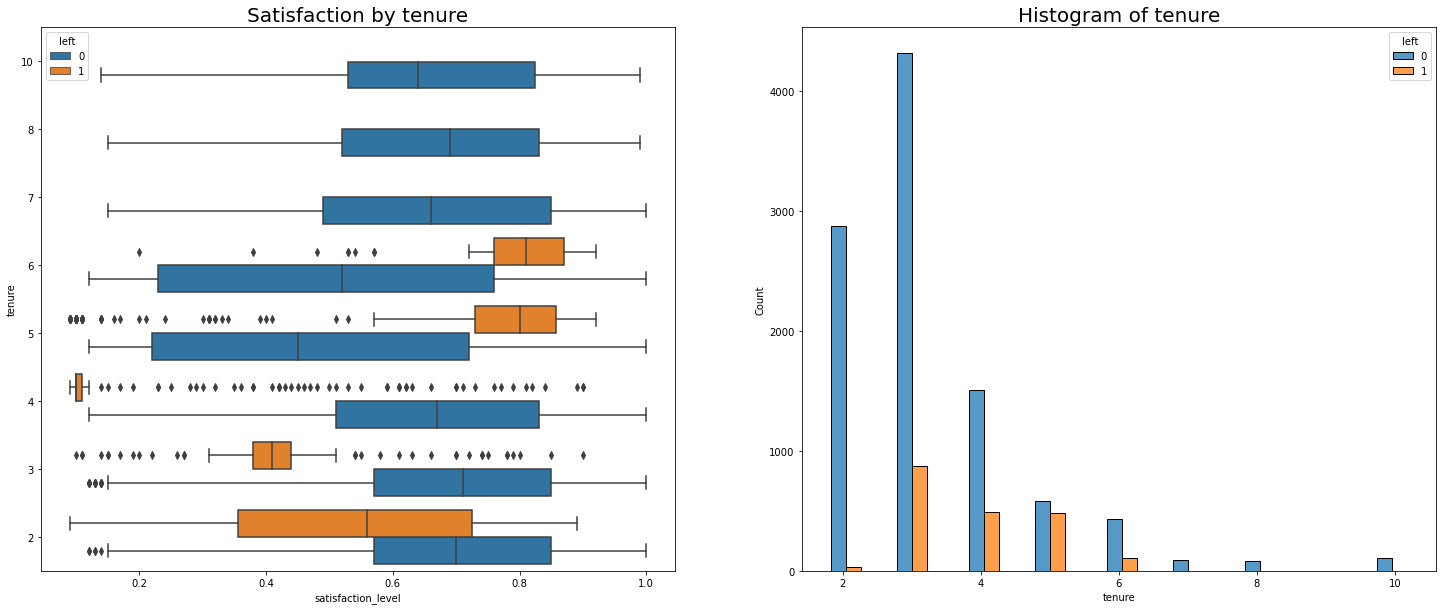

In [35]:
## plot satifaction and tenure

## set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(25,10))

##create boxplot of satifaction by tenure, comparing empolyee left vs stay
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='20')

## create histogram for tenure, comparing empolyee left vs stay
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Histogram of tenure', fontsize='20')

plt.show();

A few observations from this plot

- The employees who left mostly fall within two categorys one groups are, mid-low satifaction with shorter tenure or high satifaction with medium tenure. 

- employees with 4 years usally have a low satifaction. This is worth looking into because there might be a mechanism which leads to this outcome

- employees with the longest tenur dont leave the company 7 - 10, there satifaction level are similar to newer empolyee's 1-4.

- longer tenure emplays seem to drop off past 6, possibly because of wage or ranking. 

next lets look into mean and median satisfaction scores of the empolyees

In [36]:
## calculate mean and median of satifaction score those who left the company and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


It clear that the mean and median of those who left is lower than stay, which was expected. Note, for stayed the median score is higher than the mean score. which means the scores might be skewed to the left. 

next continuing on looking at what causes the drop off past 6 we'll look into salary and tenure

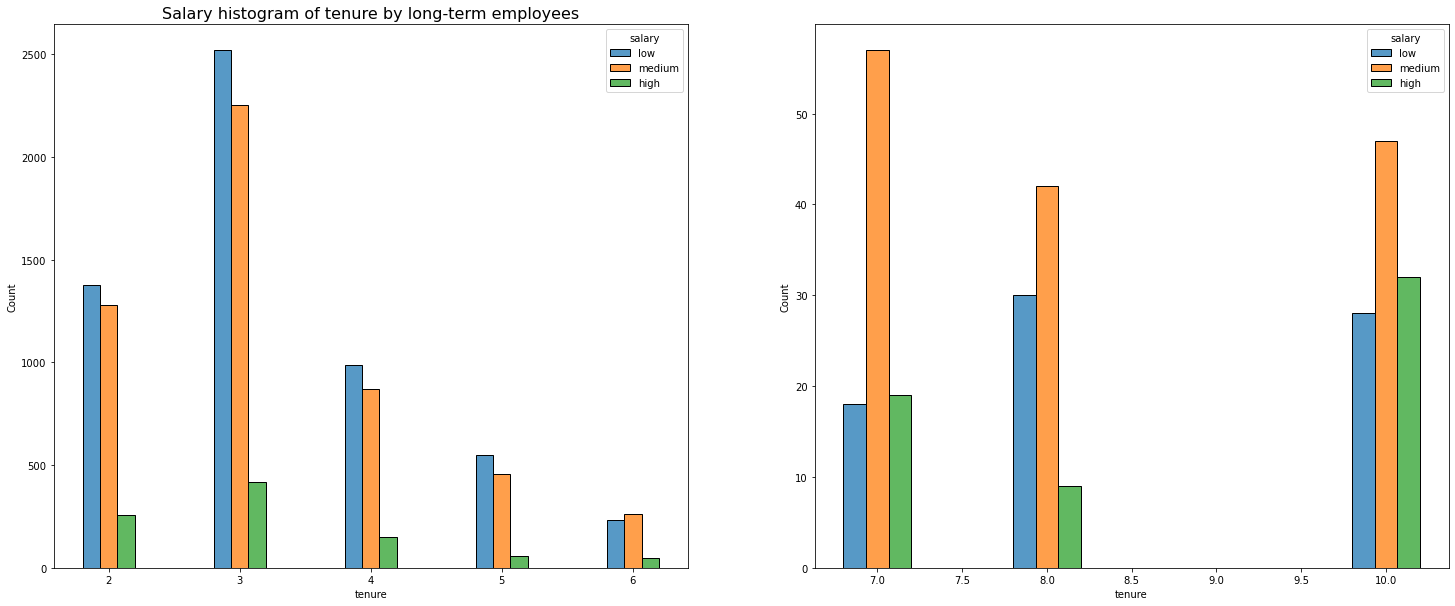

In [37]:
## create hisplot for tenure and salaries

## figures and axes
fig, ax = plt.subplots(1, 2, figsize=(25,10))

## define short term tenure
tenure_short = df1[df1['tenure'] < 7]

## define long term tenure
tenure_long = df1[df1['tenure'] > 6]

## plot short tenure histogram
sns.histplot(data=tenure_short, x='tenure',
             hue='salary',
             discrete=1,
             hue_order=['low', 'medium', 'high'],
             multiple='dodge',
             shrink=.4,
             ax=ax[0])
ax[0].set_title('Salary histogram of tenure by short-term employees', fontsize='16')

## plot long tenure histogram
sns.histplot(data=tenure_long, x='tenure',
             hue='salary',
             discrete=1,
             hue_order=['low', 'medium', 'high'],
             multiple='dodge',
             shrink=.4,
             ax=ax[1])
ax[0].set_title('Salary histogram of tenure by long-term employees', fontsize='16');


the plots show long tenure employees are disproportionately filled with higher paid employees.

next, looking back to monthly hours vs last evaluation

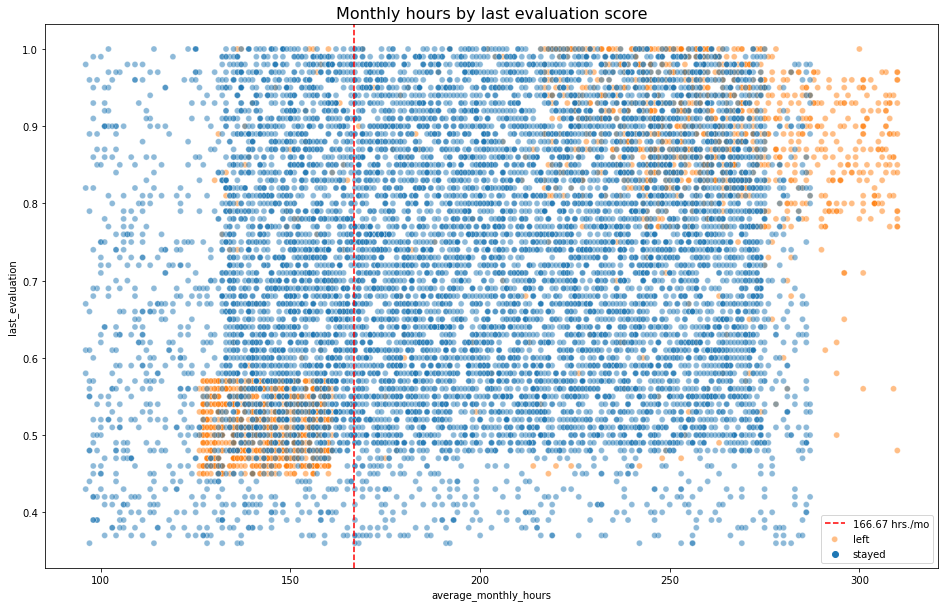

In [15]:
## creat scatterplot of averge monthly vs last evaluation
plt.figure(figsize=(16,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)

## 166.67 based on 40 hours a week
plt.axvline(x=166.67, color='red', label='166.67./mo', ls='--')
plt.legend(labels=['166.67 hrs./mo', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='16');


We can clearly see some trend in the scatter plot above.

- Two groups form: One a overworked group who performed well and a lightly underworked group who performed poorly
- There seems to be a connection with hours worked and evaluation scores, lower=lower and higher=higher.
- the more work doesnt exclusivly guarantee a higher score.
- the majory of the companies employees worked more than 166 hours per month

next, lets look into promotion vs hours worked

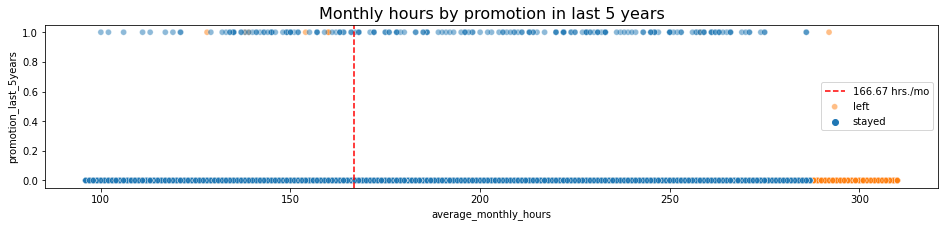

In [38]:
## create scatter plot of hours worked vs promotion in the last 5 years
plt.figure(figsize=(16,3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5)
plt.axvline(x=166.67, color='red', ls='--')
plt.legend(labels=['166.67 hrs./mo', 'left', 'stayed'])
plt.title('Monthly hours by promotion in last 5 years', fontsize='16');


The scatter plot above shows a clear difference

- a small portion of employees promoted in the last 5 years left the company
- a tiny portion of employees working the most hours were promoted in the last 5 years
- all of the tail end most hours were not promoted

next, looking into the theme of position lets look at employees who left across departments

In [39]:
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

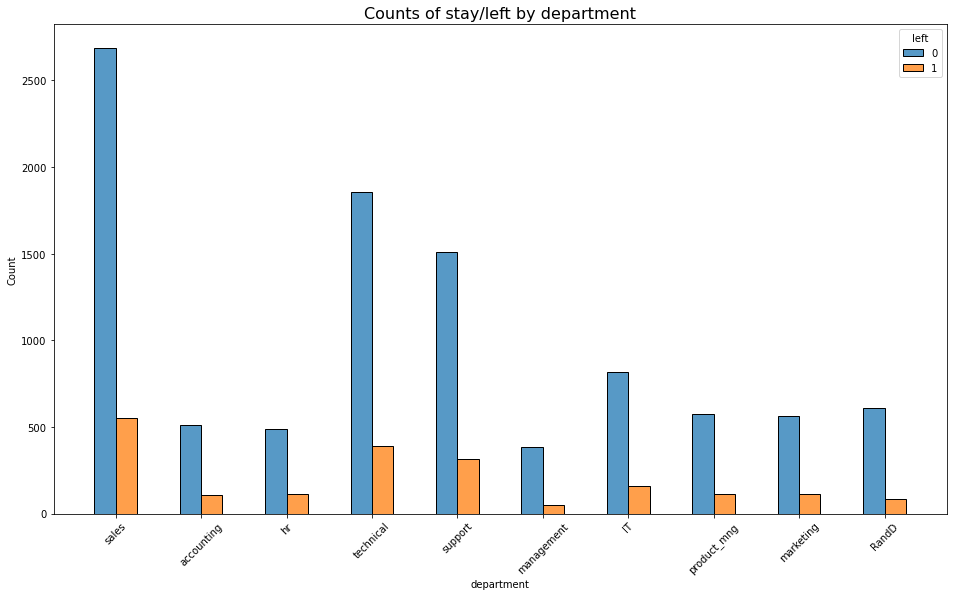

In [40]:
## create a histplot for stayed vs left by departments
plt.figure(figsize=(16,9))
sns.histplot(data=df1, x='department', hue='left',
             discrete=1,
             hue_order=[0,1],
             multiple='dodge',
             shrink=0.5)
plt.xticks(rotation='45')
plt.title('Counts of stay/left by department', fontsize='16');

It is not clear which departments have a outsized portion of stayed/left

lets take a look at the data if there are any strong correlations between any variables 

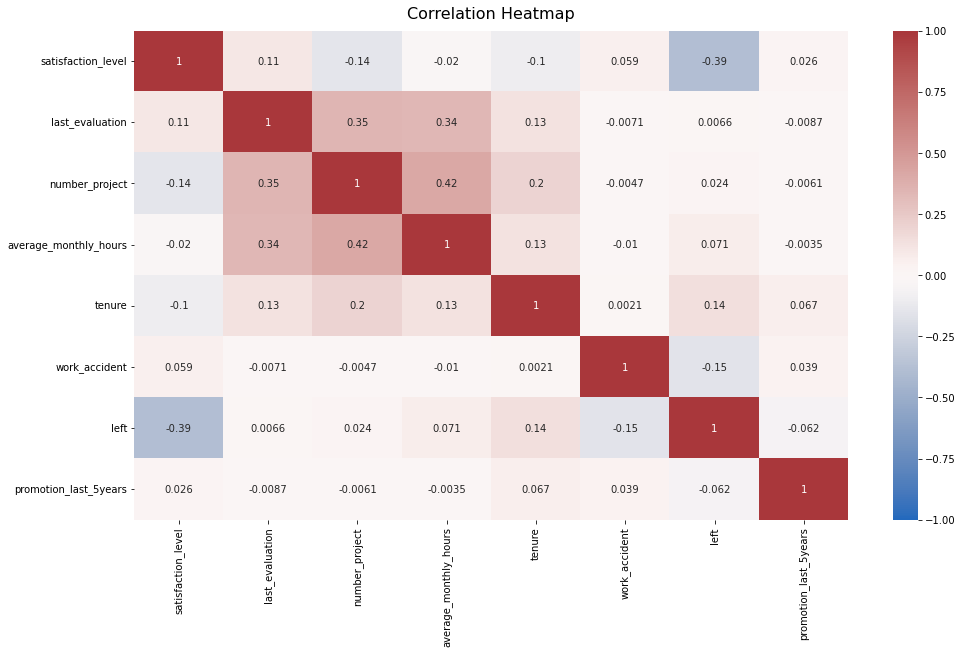

In [41]:
## correlation heatmap
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);


### Insights

The heatmap confirms that monthly hours, number of projects, and evaluation scores have a postive correlation with each other. On the otherside left and satifaction are negatively correlated

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Identify the type of prediction task.

The goal is to predict whether an employee will leave the company, which is a cateforical outcome variable. We will have to classify the barible left to either a 1 or 0(left=1, stay=0)

### Identify the types of models most appropriate for this task.

Because we want to predict the outcome of stay or leave, we should build a logistical regression model or a treebased ML. Doing both will allow us to compare the results of both models. 

### Modeling


### Model type A: Logistic Regression Model

#### Logistic Regression model
this suits the task because of the binary classification

tasks before modeling

- encode non-numerica variables, department and salary
- deparment is categorical. soluation get_dummies for modeling
- salary is categorical. It has a hieracrchy. soluation conver levels into numbers 0-2(low, med, high)


In [42]:
##copy data frame
df_enc = df1.copy()

## encode the salary to ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

## dummy endcode the 'department' column
df_enc = pd.get_dummies(df_enc, drop_first=False)

## display df_enc
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Create a heat map to visualize to discover variables worth examining 

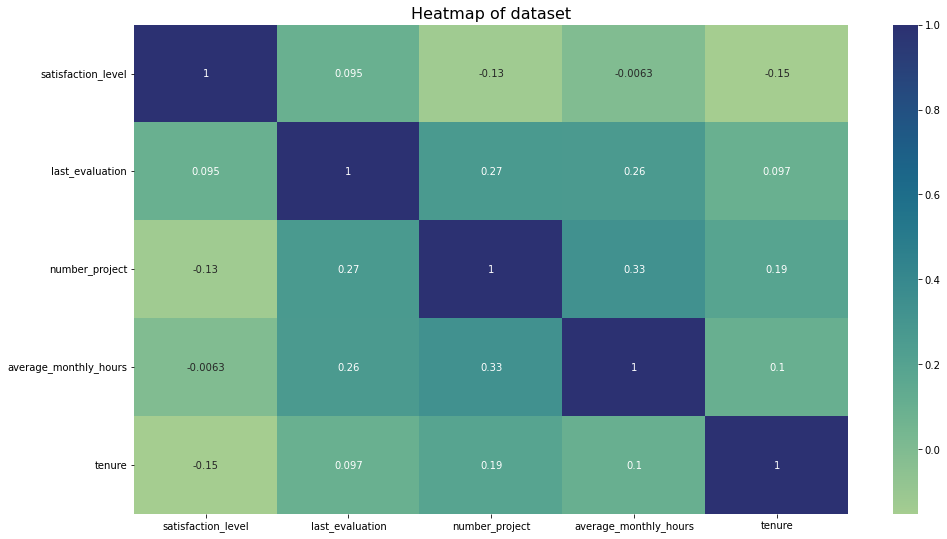

In [43]:
## create heat map to view correlation
plt.figure(figsize=(16,9))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(),
            annot=True,
            cmap='crest')
plt.title('Heatmap of dataset', fontsize='16')
plt.show()

Bart plot to visualize number of employees across departments, comparing left/stayed

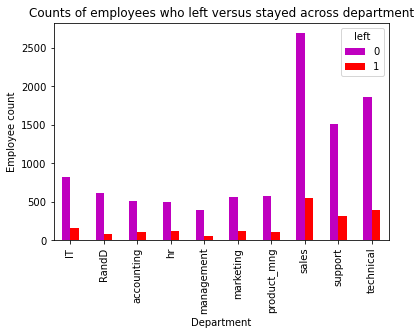

In [44]:
## create bart plot number of employees across departments comparing left vs stayed
## lengend: 0 = stayed(purple), 1 = left(red)
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Logistic regression is sensitve to outliners we should remove them from the column tenure

In [45]:
## select the rows without outliners in tenure, save in new df
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


time to isolate predicted varible

In [46]:
## isolate outcome varible
y = df_logreg['left']

y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [47]:
## select features for use on model
X = df_logreg.drop('left', axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
## splot the data into traning set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [49]:
## contruct logistic regression model and fit to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [51]:
## logistic regression model to get predictions on test set
y_pred = log_clf.predict(X_test)

Check results of the model with confusion matrix

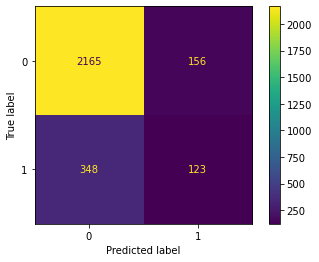

In [52]:
## compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

## create confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

## plot and display confusion matrix
log_disp.plot(values_format='')
plt.show()

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

next, create a classification report that includes precision, recall, accurcay, f1 scores to evaluate the performance of the model. Also, check the balance of the class to contexualize accuracy in the scores. 

In [53]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

It is around a 83%/17% split. The data is not perfectly balanced. If it was more imbalanced we would resample the data. We will contine to evaluate the model

In [54]:
target_names = ['Predicted would not leave', 'Pedicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
     Pedicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The Classification report shows the logistic regression model percision of 79%, recall of 82%, f1 score of 80%(all weighted averages. In predicting in who would leave the scores are a lot lower. 

### Model Approch B: Tree-Based Model

Decision Tree and Random Forest models

In [56]:
y = df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [57]:
X = df_enc.drop('left', axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
## split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=0)

In [63]:
## decision Tree model
tree = DecisionTreeClassifier(random_state=0)

## assign hyperparameters
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
## scoring metrics
scoring = {'precision', 'recall', 'accuracy', 'f1', 'roc_auc'}

## Gridsearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [64]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 3.23 s, sys: 0 ns, total: 3.23 s
Wall time: 3.23 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [65]:
## check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [67]:
tree1.best_score_

0.969819392792457

The AUC score is strong. It is able to predict employees who will leave extremely well. 

next, get the scores from grid search with a function

In [73]:
## arguments: model_name is model output table, model_object is fit gridsearch, metric is scores
def make_results(model_name:str, model_object, metric:str):
    ## create dictionary that maps inputs
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    ## get all results from cv into df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    ## Isolate the row of df with max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    ## extract scores from the row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy   
    
    ## create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [74]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


#### Random Forest - 1
construct a random forst model with crossvalidated gridsearch to search for best parameters

In [75]:
## Instatiate model 
rf = RandomForestClassifier(random_state=0)

## assign hyperparams 
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

## assign scoring meterics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

## Gridsearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [76]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 10min 20s, sys: 0 ns, total: 10min 20s
Wall time: 10min 21s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [77]:
## define path of folder to same model
path = '/home/jovyan/work/'

In [78]:
## function path location to save pickle, model_object  model to pickle, save_as is file name
def write_pickle(path, model_object, save_as:str):

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [81]:
## function path location to read from, saved_model_name file name of model read
def read_pickle(path, saved_model_name:str):

    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [79]:
## write pickle
write_pickle(path, rf1, 'hr_rf1')

In [82]:
## read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [83]:
## check AUC score 
rf1.best_score_

0.9804250949807172

In [84]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [85]:
## all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


All the scores are better except the recall score which is 0.001 worse. 

next test the final scores of the model

In [86]:
## func input model output metric scores
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [87]:
## predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


the model scores are close to the test scores. This gives confidence if the model can handle new or unseen data. 

#### Feature engineering

With high test scores its good to be skeptical. Because there is a chance of data leakage during the traing processes. A model with there properties can give scores that are not achievable during production. 

For this dataset, It is possible that the company does not report satisfaction levels of all employees. There is also a scenario where if an employee is already leaving or about to be fired they will work fewer hours which could cause data leakage. 

Next we will try to engineer a feature to improve the model. We ill try by droping satisfaction leve and creating a new feature overworked. This will be a binary variable

In [89]:
## drop satisfaction_level, save a new data frame
df2 = df_enc.drop('satisfaction_level', axis=1)

df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [90]:
## create overworked column, for not = to avg monthly hours
df2['overworked'] = df2['average_monthly_hours']

## Show min max of avg monthly hours
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the averge monthly hours of someone who works 50 weeks per year, 5 days per week, 8 hours per day.

we can define overworked to be 175 hours per month on avgerage. 

to make overworked column binary, reassign the column using a boolean mask


In [91]:
## define overworked as working > 175 hours per week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [92]:
## drop average monthly hours
df2 = df2.drop('average_monthly_hours', axis=1)

df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [93]:
## isolate outcome varible
y = df2['left']
## select features
X = df2.drop('left', axis=1)

In [94]:
## create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree 2

In [95]:
## tree model
tree = DecisionTreeClassifier(random_state=0)

## assign hyperparams
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
## scoring meterics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

## gridsearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [96]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.75 s, sys: 0 ns, total: 2.75 s
Wall time: 2.76 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [98]:
## check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [99]:
## check AUC score on cv
tree2.best_score_

0.9586752505340426

In [100]:
## all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


some of the scores fell, which is expected at this point

In [101]:
## model #2
rf = RandomForestClassifier(random_state=0)

## Assign hyperparameters
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

## Assign scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

## GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [102]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 7min 53s, sys: 0 ns, total: 7min 53s
Wall time: 7min 54s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [103]:
## Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [104]:
## Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [105]:
## best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [106]:
rf2.best_score_

0.9648100662833985

In [107]:
## all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


The scores dropped a little, looking at the AUC as a decidiing metric. Now, Score the champion model on the test set

In [108]:
## predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


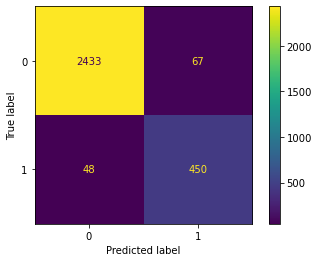

In [109]:
## generate values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

## Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which could mean some employees are idenified to be at risk of quit/fired when it was not the case. The model results seem strong. 

for more clarity lets inspect the decision tree model in the random forest model. 

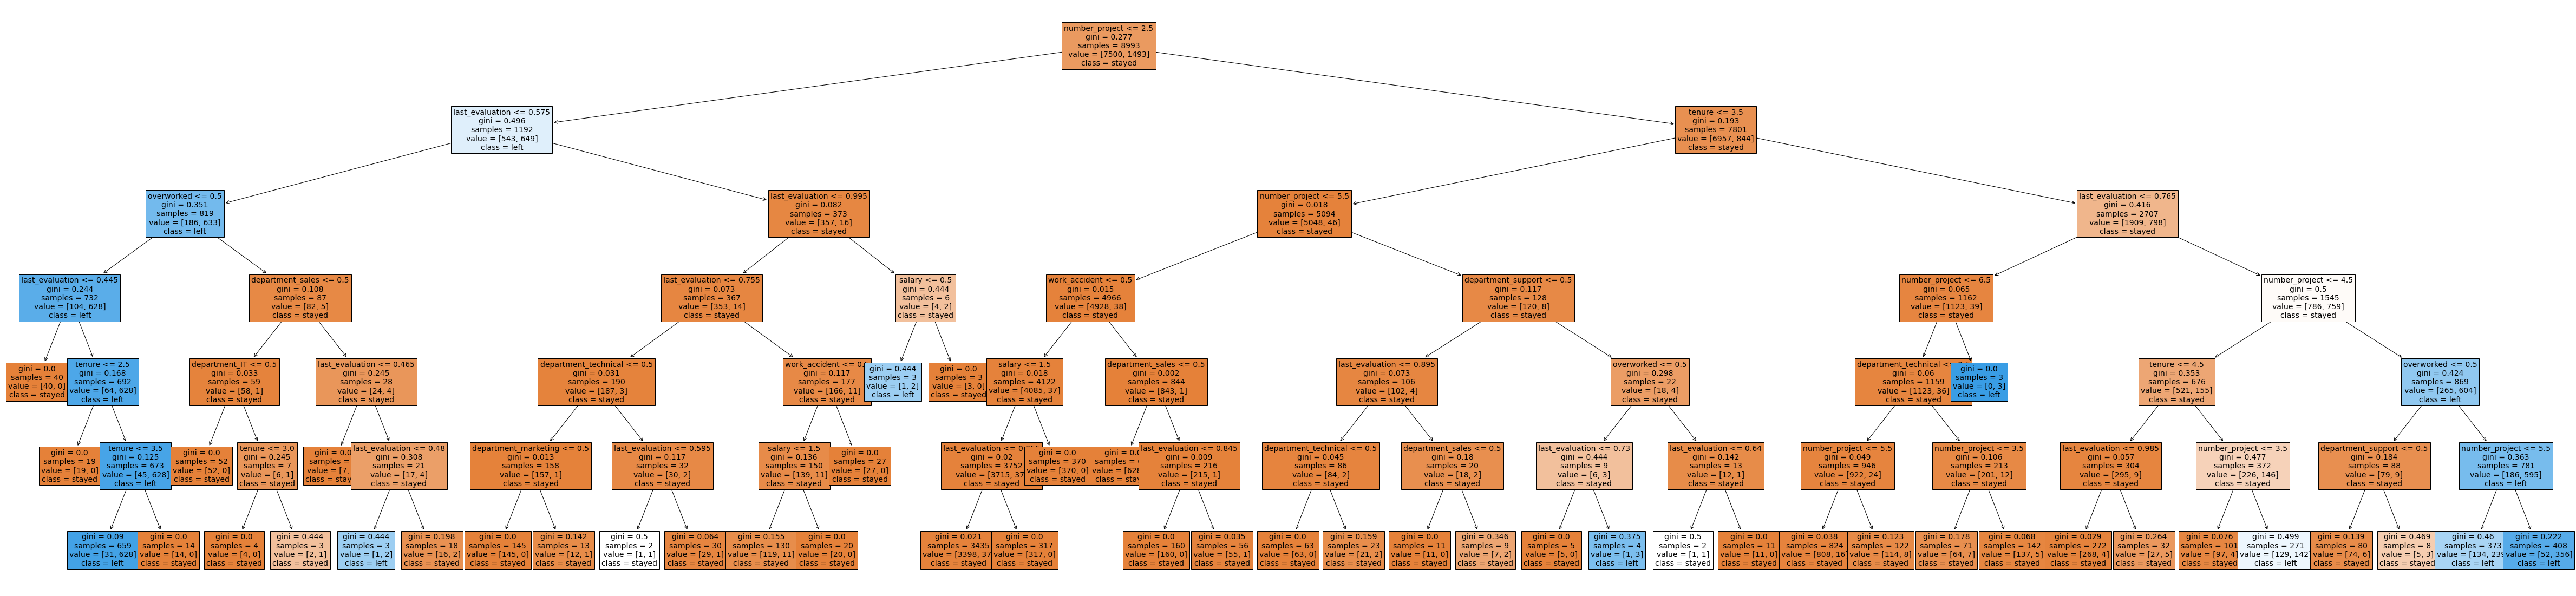

In [110]:
## Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance
resource https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_

In [111]:
## tree importances
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


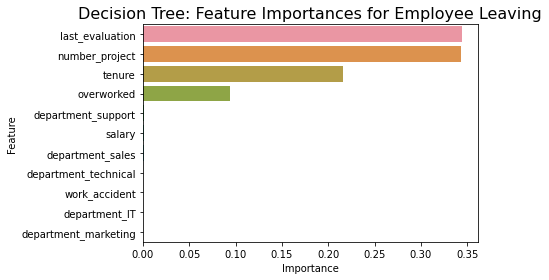

In [112]:
## create barplot on decision three feature importances
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=16)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot shows last_evaluation, number_project, tenure, and overworked are the highest of importance. These varibles will predict the outcome of left/stay

#### Random Forest feature importance


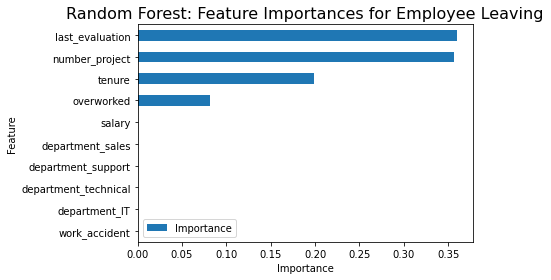

In [113]:
## feature importances
feat_impt = rf2.best_estimator_.feature_importances_

## indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

## column labels of top 10 features 
feat = X.columns[ind]

## feat_impt to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=16)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot shows the random tree models importance in this order last_evaluation, number_project, tenure, and overworked. These varibles will predict the outcome of left/stay. The varibles are the same as teh decision tree model

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)? Number of projects, tenure, and overworked are the three main factors of employee retention
- What business recommendations do you propose based on the models built? cap number of projects, set overtime expectations
- What potential recommendations would you make to your manager/company? Regather satifaction data after policy changes
- Do you think your model could be improved? Why or why not? How? the model performs well however, with more accurate evaluation scores will help
- Given what you know about the data and the models you were using, what other questions could you address for the team? 
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.) personal notes
- Do you have any ethical considerations in this stage? 



### Summary of model results

##### Logistic regession 

model metrics achieved: precision of 80%, recall of 83%, f1-score of 80% (all weighted averages). Accuracy of 83%, on the test set.

##### Tree-based Machine Learning
With feature engineering, the Decision three achieved: precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, AUC of 93.8%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the modeles can confirm that employees at the company are overworked.

For future employeee retention these recommendations could be presented

- Number of projects cutoff point
- Promoting employees who have been at the company for at least 4 years or check reason for satifaction for employees with 4 year tenure
- Do not require employees to work longer hours or compensate them accordingly
- Make clear about expectation about workload, possibly inform about overtime pay policies.
- Company wide and in teams discussion about company work culture, look in to speicfics for each team. 
- Evaluation scores should not be reseved for employees with 200+ hours per month. Rescale for employees who contrubte more. 